In [87]:
os.getcwd()

'C:\\Users\\benja\\VT_P_index\\model'

In [88]:
import numpy as np

In [89]:
import pandas as pd
import os
from scipy import stats
import geopandas as gpd
os.chdir(r"C:\Users\benja\VT_P_index\model")

In [102]:
def CDF(X, Xname,**kwargs):
    '''Plot the cumulative distribution function of a variable.'''
    X=sorted(X)
    N=len(X)
    Y=[i/N for i in range(N)]
    fig= plt.plot(X, Y, '.-', **kwargs)
    plt.xlabel(Xname)
    plt.ylabel("$P_<(x)$")
    return fig

In [90]:
df=pd.read_csv(r"C:\Users\benja\VT_P_index\soil_test_results.csv")

In [91]:
field_codes='''125
133
126
134
128
135
129
136
91
109
94
99
253
88
100
219
101
90
138
83
195
84
230
87
231
86
232
85
137
234'''.split('\n')

df['County']=df['County'].apply(lambda x: str(x).upper())

field_codes=[int(c) for c in field_codes]
df=df[df['Crop ID'].isin(field_codes)]

In [92]:
os.getcwd()

'C:\\Users\\benja\\VT_P_index\\model'

In [93]:
df['Zip']=df['Zip'].astype(str)
df['Zip']='0'+df['Zip']
df['Zip']=df['Zip'].apply(lambda x: x.split('-')[0])

In [94]:
crop_fields=gpd.read_file(r"C:\Users\benja\VT_P_index\model\P_Index_LandCoverCrops\P_Index_LandCoverCrops\Crop_DomSoil.shp")
crs=crop_fields.crs

zip_code_path=os.path.join('Source_data', 'VT_ZIP_Code_Areas-shp')
soil_tests_path=os.path.join('Source_data', 'soil_test_results.csv')

zips=gpd.read_file(zip_code_path)
zips.to_crs(crs, inplace=True)


counties=gpd.read_file(r"C:\Users\benja\VT_P_index\model\Source_data\VT_Data_-_County_Boundaries-shp\VT_Data_-_County_Boundaries.shp")
counties.to_crs(zips.crs, inplace=True)
zc=gpd.overlay(zips, counties)

zc['Area']=zc.geometry.area
zc.sort_values(by='Area', inplace=True, ascending=False)
zc=zc.dissolve(by='NAME')


In [95]:
zc

,geometry,OBJECTID_1,ZCTA,LSAD,LSAD_TRANS,SHAPESTAre,SHAPESTLen,OBJECTID_2,CNTY,CNTYNAME,CNTYGEOID,ShapeSTAre,ShapeSTLen,Area
NAME,,,,,,,,,,,,,,
05001,"MULTIPOLYGON (((704891.210 4844418.351, 704991...",226,05001,Z5,5-Digit ZCTA,7.429592e+07,64730.410355,4,27,WINDSOR,50027,2.529818e+09,311640.033527,7.425044e+07
05031,"POLYGON ((693993.921 4847049.191, 693985.407 4...",217,05031,Z5,5-Digit ZCTA,1.189134e+07,18631.095225,4,27,WINDSOR,50027,2.529818e+09,311640.033527,1.189365e+07
05032,"POLYGON ((691545.694 4861895.271, 694310.706 4...",194,05032,Z5,5-Digit ZCTA,1.897057e+08,120352.110715,4,27,WINDSOR,50027,2.529818e+09,311640.033527,1.897287e+08
05033,"POLYGON ((725913.459 4882172.215, 731559.599 4...",176,05033,Z5,5-Digit ZCTA,9.468930e+07,60840.430645,11,17,ORANGE,50017,1.790718e+09,208655.885389,9.431779e+07
05034,"POLYGON ((692615.788 4832320.852, 692898.320 4...",244,05034,Z5,5-Digit ZCTA,1.576796e+07,23361.431592,4,27,WINDSOR,50027,2.529818e+09,311640.033527,1.577059e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05903,"POLYGON ((763239.214 4989707.163, 767116.978 4...",2,05903,Z5,5-Digit ZCTA,1.753877e+08,74089.799427,8,9,ESSEX,50009,1.740875e+09,275955.161519,1.745490e+08
05904,"POLYGON ((759663.156 4922366.165, 759608.251 4...",111,05904,Z5,5-Digit ZCTA,1.351188e+07,16840.148107,8,9,ESSEX,50009,1.740875e+09,275955.161519,1.336800e+07
05905,"POLYGON ((763523.904 4974944.230, 769770.692 4...",33,05905,Z5,5-Digit ZCTA,4.515635e+08,142172.620343,8,9,ESSEX,50009,1.740875e+09,275955.161519,4.494344e+08


In [96]:
gdf=gpd.GeoDataFrame(pd.merge(df, zc, right_on='ZCTA', left_on='Zip', 
                              how='left', validate='many_to_one'))
gdf.drop(columns=['CNTYGEOID', 'ShapeSTAre', 'ShapeSTLen', 
         'Area', 'LSAD', 'LSAD_TRANS', 'SHAPESTAre', 'SHAPESTLen', 'OBJECTID_2',
       'CNTY', 'OBJECTID_1',], inplace=True)

gdf['County']=gdf['CNTYNAME']


gdf=gdf[gdf['geometry'].isna()==False]
gdf=gdf[gdf['County'].isin(['ADDISON', 'GRAND ISLE', "CHITTENDEN", 'FRANKLIN'])]


gb=gdf[['Zip','P','Al', 'geometry']]

gb1=gb.dissolve('Zip', aggfunc='mean')

gb2=gdf[['County','P','Al', 'geometry']]
gb4=gb2.dissolve('County', aggfunc='mean')

gb3=gb2.dissolve('County', aggfunc='count')


gb5=gb2.dissolve('County', aggfunc='median')

In [234]:
np.sort(P.values)

array([5.0000e-01, 5.0000e-01, 5.5000e-01, ..., 2.6040e+02, 6.7500e+02,
       1.0675e+03])

In [98]:
import matplotlib.pyplot as plt

In [99]:
P=gdf[gdf['P'].isna()==False]['P']
Al=gdf[gdf['Al'].isna()==False]['Al']

In [104]:
import pystan
import numpy as np

In [591]:
model_code = """
    data {
      int<lower=0> N;
      real<lower=0> y[N];
    }
    parameters {
      real<lower=0> alpha;
      real<lower=0> beta;
    }
    model {
      alpha ~ uniform(0, 20; 
      beta ~ uniform(0, 20);
      y ~  lognormal(alpha, beta);
    }
"""

data = np.sort(P.values)-.4
sm = pystan.StanModel(model_code=model_code)
P_fit = sm.sampling(data=dict(y=data, N=len(data)))
print(P_fit)



INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3056885ae920e8ab14b4392bf81d330a NOW.


Inference for Stan model: anon_model_3056885ae920e8ab14b4392bf81d330a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   1.08  2.7e-4   0.01   1.05   1.07   1.08   1.09   1.11   3042    1.0
beta    1.12  1.7e-4   0.01    1.1   1.11   1.12   1.12   1.14   3739    1.0
lp__   -3647    0.02   0.99  -3650  -3648  -3647  -3647  -3647   1836    1.0

Samples were drawn using NUTS at Thu Aug 27 19:01:44 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
alpha=P_fit['alpha'].mean()
beta=P_fit['beta'].mean()

In [592]:
sim_vals=stats.lognorm(P_fit['alpha'].mean(), 
            scale=np.exp(P_fit['beta'].mean())).rvs(4000)+.4

In [605]:
np.exp(beta)

2.645160951479613

In [594]:
sim_vals.mean()

5.883228610807101

In [584]:
3.67/(1.49-1)

7.489795918367347

In [530]:
sim_vals=stats.invgamma(alpha, scale=beta).rvs(4000)

In [531]:
sim_vals.mean()

6.116953133080377

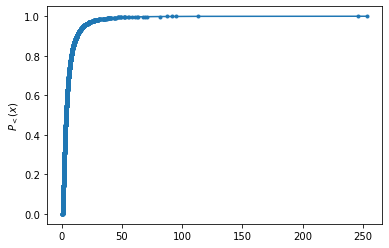

In [595]:
CDF(sim_vals, '')

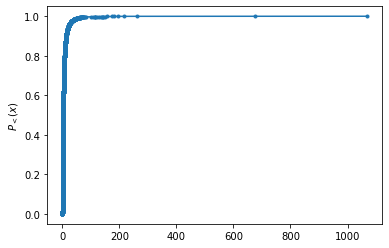

In [596]:
CDF(Pv, '')

In [597]:
Pv=P.values
np.random.shuffle(Pv)
dif_vals=np.sort(Pv[:4000])/np.sort(sim_vals)

(array([5.189e+03, 4.810e+02, 1.570e+02, 5.900e+01, 3.300e+01, 2.100e+01,
        1.100e+01, 4.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

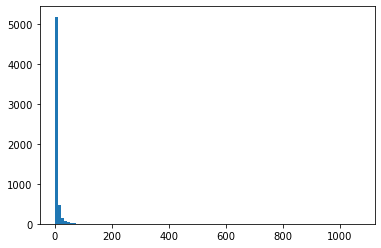

In [601]:
plt.hist(P.values, bins=100)

In [604]:
stats.lognorm?

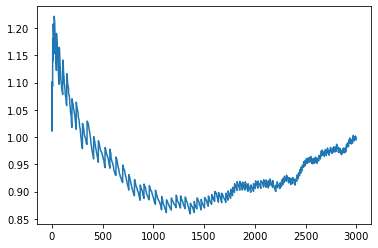

In [603]:
plt.plot(dif_vals[:3000])

In [654]:
Al=df[df['Al'].isna()==False]['Al']

In [660]:
Az

array([111., 126., 132., ...,  11.,  23.,  11.])

In [655]:
Az=Al.values

In [752]:
Az.min()

2.0

In [753]:
shift=Az.min()-.0001

In [754]:
model_code = """
    data {
      int<lower=0> N;
      real<lower=0> y[N];
    }
    parameters {
      real<lower=0> alpha;
      real<lower=0> beta;
    }
    model {
      alpha ~ uniform(0, 500); 
      beta ~ uniform(0, 500);
      y ~  gamma(alpha, beta);
    }
"""

data = Az-shift
sm = pystan.StanModel(model_code=model_code)
Al_fit = sm.sampling(data=dict(y=data, N=len(data)))
print(Al_fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_71f2afb64305377f9d4259e576ac0c7a NOW.


Inference for Stan model: anon_model_71f2afb64305377f9d4259e576ac0c7a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   1.25  3.7e-4   0.01   1.22   1.24   1.25   1.26   1.27   1150    1.0
beta    0.02  6.2e-6 2.1e-4   0.02   0.02   0.02   0.02   0.02   1136    1.0
lp__  -8.2e4    0.03   0.93 -8.2e4 -8.2e4 -8.2e4 -8.2e4 -8.2e4   1283    1.0

Samples were drawn using NUTS at Fri Aug 28 10:00:38 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [700]:
import matplotlib.pyplot as plt


In [701]:
Al.values.min()-.00001

1.99999

In [750]:
shift

9.999999999998899e-05

In [755]:
sim_vals=stats.gamma(Al_fit['alpha'].mean(), 
            scale=1/Al_fit['beta'].mean(), loc=shift).rvs(4000)

In [748]:
rv=stats.gamma(Al_fit['alpha'].mean(), 
            scale=1/Al_fit['beta'].mean())

In [749]:
np.sort(sim_vals)

array([  4.13345531,   4.22834866,   4.30518537, ..., 447.46185294,
       456.04777183, 567.65516483])

In [763]:
sim_vals.min()
Az.min()

2.0

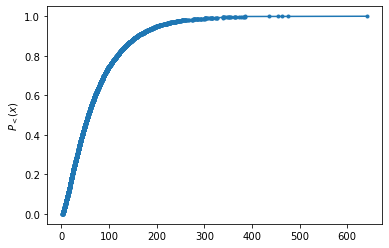

In [756]:
CDF(sim_vals, '')

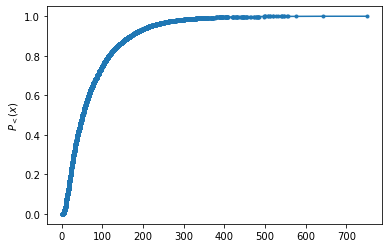

In [757]:
CDF(Az, '')

In [758]:
np.random.shuffle(Az)

In [764]:
stats.gamma?

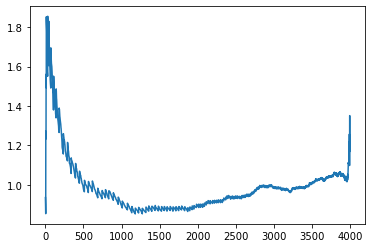

In [761]:
vals=np.sort(A)/np.sort(sim_vals)
plt.plot(vals)

In [734]:
np.sort(A)[:100]

array([2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])

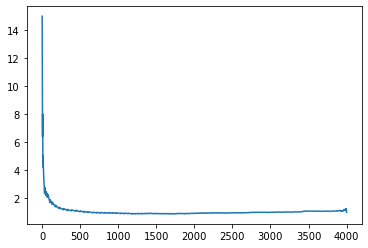

In [697]:
vals2=np.sort(A)/np.sort(sim_vals)
plt.plot(vals2)

In [115]:
np.sort(stats.gamma(1.36, scale=1/.03).rvs(4000))[:100]

array([0.11359596, 0.1710703 , 0.29958702, 0.42394427, 0.52750305,
       0.56592512, 0.57018199, 0.5882443 , 0.60703672, 0.62197267,
       0.67319709, 0.80770055, 0.81664706, 0.84230878, 0.88263384,
       0.91341015, 0.92316064, 0.9416652 , 0.95121522, 0.98831099,
       1.00348506, 1.00430091, 1.01105573, 1.06915627, 1.07246704,
       1.20389818, 1.23309612, 1.24701406, 1.24764009, 1.25612637,
       1.31813234, 1.37185203, 1.37206227, 1.38312185, 1.42915614,
       1.48148472, 1.48647277, 1.49424038, 1.49445316, 1.54188029,
       1.55096309, 1.58705831, 1.60946641, 1.61296749, 1.6616902 ,
       1.68045472, 1.690724  , 1.71667099, 1.72457861, 1.7290854 ,
       1.75689318, 1.76169709, 1.78298058, 1.8046078 , 1.82987083,
       1.85725065, 1.86718745, 1.88035448, 1.99584947, 2.0002906 ,
       2.00733153, 2.02362788, 2.04420243, 2.05673412, 2.0987958 ,
       2.10015927, 2.10389003, 2.13326402, 2.16994149, 2.1747136 ,
       2.17487498, 2.18348838, 2.18444795, 2.20804294, 2.21705

In [ ]:
np.sort()

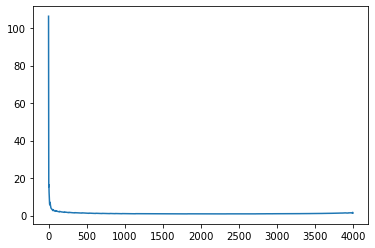

In [168]:
vals=np.sort(Al.values[:4000])/np.sort(stats.gamma(1.36, scale=1/.03).rvs(4000))[:4000]
plt.plot(vals)

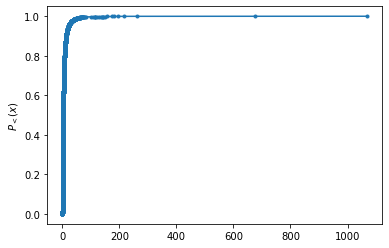

In [176]:
CDF(P.values, '')

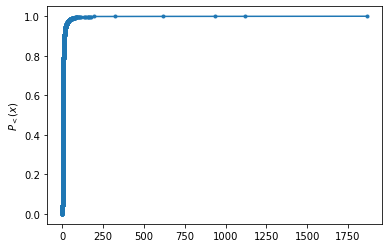

In [180]:
CDF(stats.invgamma(1.49, scale=3.67).rvs(4000), '')

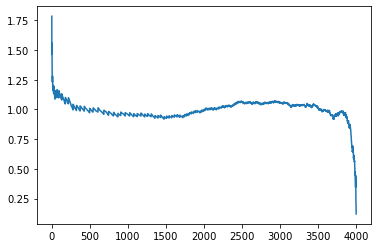

In [189]:
plt.plot(vals)

(array([2.966e+03, 5.840e+02, 1.870e+02, 8.700e+01, 4.200e+01, 3.300e+01,
        1.600e+01, 1.500e+01, 1.200e+01, 4.000e+00, 9.000e+00, 8.000e+00,
        4.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

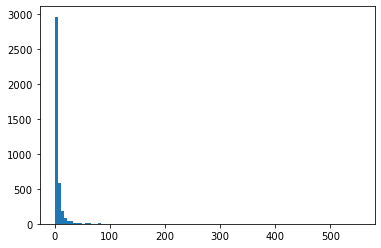

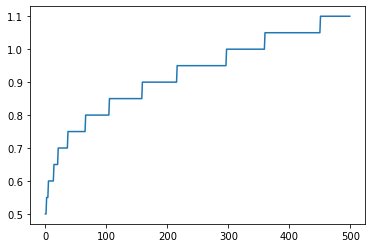

In [80]:
plt.plot(np.sort(P.values)[:500])

In [32]:
import matplotlib.pyplot as plt

In [62]:
stats.chi2?

In [36]:
Al.values.shape

(4923,)

In [81]:
stats.invgamma?

In [54]:
stats.chi2

In [55]:
stats.chi2?